# CSCE 633 Homework 2
# Urban Traffic Prediction

Name: Rizu Jain | UIN: 430000753

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Import data into dataframes
df_train = pd.read_csv('hw2__question1_train.csv', sep = ',')
df_test = pd.read_csv('hw2__question1_test.csv', sep = ',')

# Segregate the outcome column in both train and test data
newX = df_train.iloc[:,:-1]
testX = df_test.iloc[:,:-1]
newY= df_train.iloc[:,-1]
testY = df_test.iloc[:,-1]

# (i.) Data Exploration

Histogram of Features and Outcome of interest

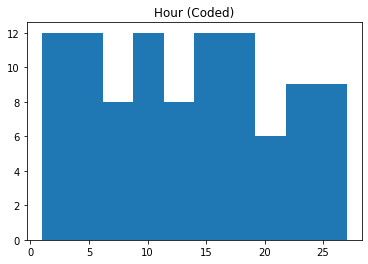

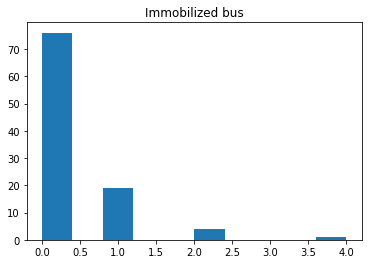

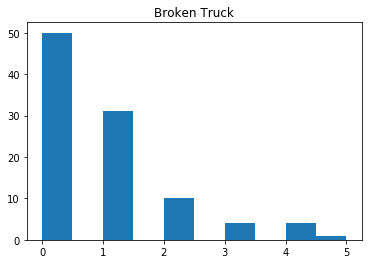

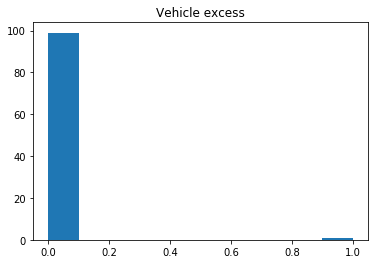

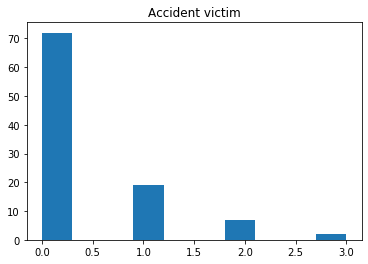

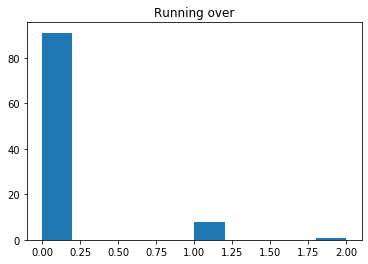

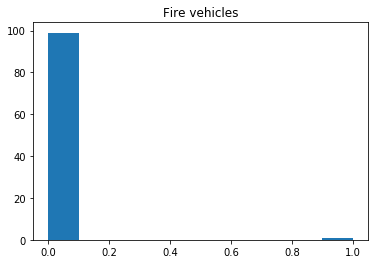

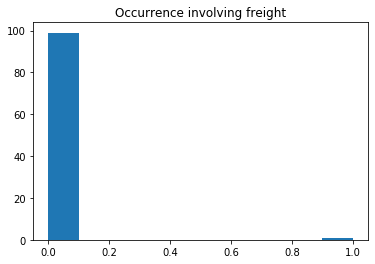

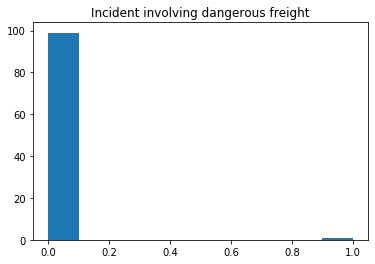

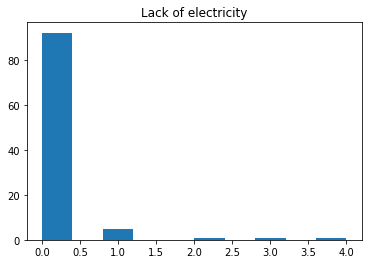

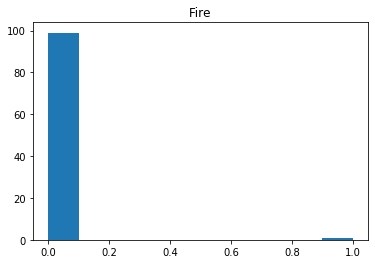

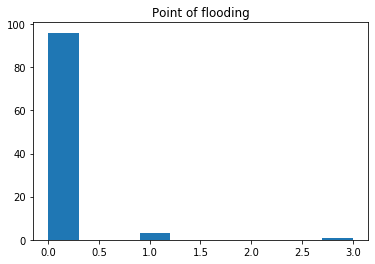

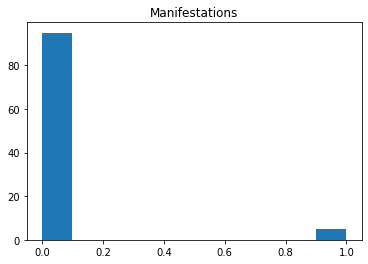

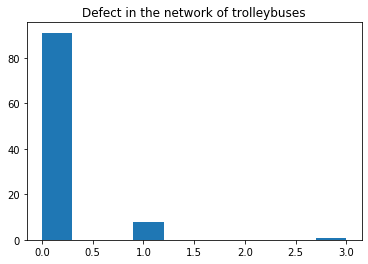

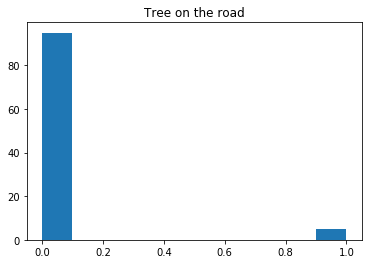

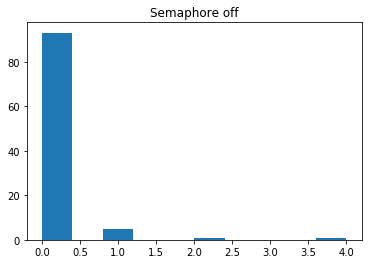

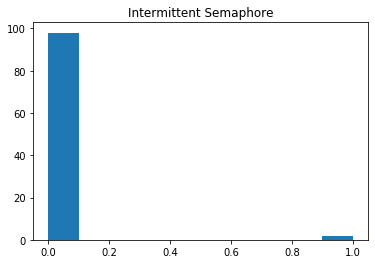

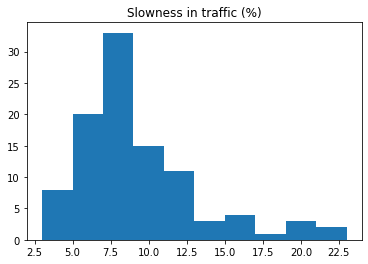

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot histogram of features
for i in range(df_train.shape[1]):
    plt.hist(df_train.iloc[:,i])
    plt.title(df_train.columns[i])
    plt.figure()
    

# (ii.) Data Exploration

Pearson Coefficient between each feature and the outcome of interest

In [4]:
# Computer pearson's correlation coefficient between all features and the outcome of interest
print("Computation of Pearson's correlation coefficient"
      " between features and the outcome of interest (% slowness in traffic): \n")
print("Correlation  \t Feature ")
for i in range(df_train.shape[1]-1):
    corr, p = pearsonr(df_train.iloc[:,i], newY)
    print("%0.3f\t\t" % corr, df_train.columns[i], )

Computation of Pearson's correlation coefficient between features and the outcome of interest (% slowness in traffic): 

Correlation  	 Feature 
0.671		 Hour (Coded)
0.155		 Immobilized bus
0.147		 Broken Truck
-0.146		 Vehicle excess
0.127		 Accident victim
-0.012		 Running over
0.184		 Fire vehicles
0.057		 Occurrence involving freight
0.032		 Incident involving dangerous freight
0.574		 Lack of electricity
-0.045		 Fire
0.456		 Point of flooding
-0.056		 Manifestations
-0.168		 Defect in the network of trolleybuses
-0.079		 Tree on the road
0.429		 Semaphore off
-0.136		 Intermittent Semaphore


# (iii.) Implementation of Linear Regression

In [5]:
# Implementaion of Linear Regression

# Add the ones column in the input matrix in the train data
intercept = np.ones((df_train.shape[0],1))
X = np.concatenate((intercept,newX.values),1)

# Add the ones column in the input matrix in the test data
intercept_test = np.ones((df_test.shape[0],1))
X_test = np.concatenate((intercept_test,testX.values),1)

# Compute the optimal weight vector w* using the OLS solution
term1 = X.T.dot(X)
term1_inv = np.linalg.inv(term1)
term2 = X.T.dot(newY.values)
w = term1_inv.dot(term2)


# (iv.) Testing of model

In [6]:
# Predict Y (outcome of interest) on test data
Y_pred = np.matmul(X_test,np.transpose(w))

# Using the Pearson's Correlation Coefficient
# Compute the correlation between predicted and actual output
test_score, test_score_p = pearsonr(Y_pred,testY.values)
print("Pearson's Correlation Coefficient Metrics: ")
print("r=" + format(test_score, '.2f') + ", p=" + format(test_score_p, '.2f'))


# Using the RSS
# Compute the RSS between predicted and actual output
rss = np.sum(np.square(Y_pred - testY.values))
print("\nResidual Sum of Squares Metrics: ")
print("rss_err=" + format(rss, '.2f'))


Pearson's Correlation Coefficient Metrics: 
r=0.82, p=0.00

Residual Sum of Squares Metrics: 
rss_err=501.86


# (v.) Different Feature Combinations 


In [7]:
# scikit rfe
# recursive feature elimination

# (vi.) Implementation of Logistic Regression

In [8]:
# Logistic Regression using scikit.learn

# Binarise the output (Slowness in traffic (%))
mean_thres = np.mean(newY)
newY_bin = (newY > mean_thres).astype(np.int_)
testY_bin = (testY > mean_thres).astype(np.int_)

# Train the model
logreg = LogisticRegression(random_state=0, solver='lbfgs')
logreg.fit(newX,newY_bin)

# Predict on test data
y_pred=logreg.predict(testX)

print("Accuracy:",metrics.accuracy_score(testY_bin, y_pred))
print("Precision:",metrics.precision_score(testY_bin, y_pred))
print("Recall:",metrics.recall_score(testY_bin, y_pred))

Accuracy: 0.7142857142857143
Precision: 1.0
Recall: 0.6551724137931034


# (vii.) Regularisation